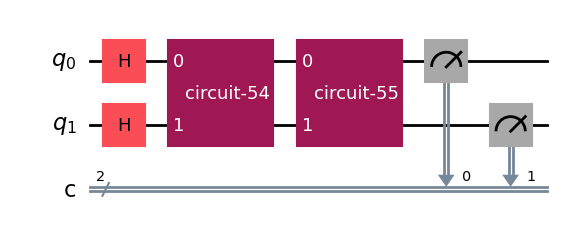

In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer

# Oracle for |11>
oracle = QuantumCircuit(2)
oracle.cz(0, 1)

# Diffusion operator
diffuser = QuantumCircuit(2)
diffuser.h([0, 1])
diffuser.x([0, 1])
diffuser.h(1)
diffuser.cx(0, 1)
diffuser.h(1)
diffuser.x([0, 1])
diffuser.h([0, 1])

# Full Grover circuit
grover = QuantumCircuit(2, 2)
grover.h([0, 1])
grover.append(oracle, [0, 1])
grover.append(diffuser, [0, 1])
grover.measure([0, 1], [0, 1])

# Show circuit
grover.draw('mpl')


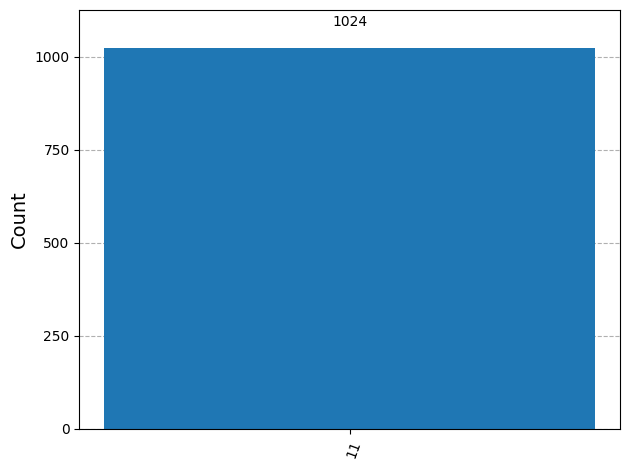

In [3]:
counts = Aer.get_backend("qasm_simulator").run(
    transpile(grover, Aer.get_backend("qasm_simulator")),
    shots=1024
).result().get_counts()

plot_histogram(counts)


In [4]:
print(grover.draw())


     ┌───┐┌─────────────┐┌─────────────┐┌─┐   
q_0: ┤ H ├┤0            ├┤0            ├┤M├───
     ├───┤│  circuit-54 ││  circuit-55 │└╥┘┌─┐
q_1: ┤ H ├┤1            ├┤1            ├─╫─┤M├
     └───┘└─────────────┘└─────────────┘ ║ └╥┘
c: 2/════════════════════════════════════╩══╩═
                                         0  1 
